# Solving the Malthus model

> **Table of contents:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

*Imports and set magics*

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# plotting
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

We consider the **standard Malthus-model**. We assume discrete time, $t\in\{0,1,\dots\}$ and a closed economy. Therefore, total production equals income. 

An assumption in the Malthus model is that labor is subject to diminishing returns in production. We model this with a Codd-Douglas production function:

$$
Y_{t}=L_{t}^{1-\alpha}(AX)^{\alpha}
$$

1. $L_t$ is labor (we assume no unemployment)
3. $A$ is technology (is constant over time)
4. $X$ is land (is constant over time)
5. $Y_t$ = is GDP (production)

Output pr. worker is thus given by:

$$
y_{t}=\left(\frac{AX}{L_t}\right)^{\alpha}
$$

Since $\alpha<1$ (diminishing returns) we have that as L increases, output per worker declines, given that AX is constant.

The second assumption is that the birth rate in the economy (i.e., births per capita) rises with per capita income:

$$
n_{t} = \eta y_{t}, \ \ \ \eta>0
$$

We assume that the number of preferred kids is rising in per capita income.

The above equation implies that each parent uses a fraction of their income to care for children and thus consumes the remaining fraction. 

The size of the labor force evolves according to:

$$
L_{t+1} = n_{t}L_{t}+(1-\mu)L_{t}, \ \ \ L_{0} \ given
$$

The above equation implies that $\mu$ represents mortality.

The law of motion for the labor force will therefore be given by:

$$
L_{t+1} = \eta L_{t}^{1-\alpha}(AX)^{\alpha}+(1-\mu)L_{t}, \ \ \ L_{0} \ given
$$

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

In [2]:
Yt = sm.symbols('Y_t')
Lt = sm.symbols('L_t')
Lt1 = sm.symbols('L_{t+1}')
A = sm.symbols('A')
X = sm.symbols('X')
yt = sm.symbols('y_t')
nt = sm.symbols('n_t')
alpha = sm.symbols('alpha')
mu = sm.symbols('mu')
eta = sm.symbols('eta')
L_star = sm.symbols('L^*')
y_star = sm.symbols('y^*')

In [3]:
# Law of motion
LOM = sm.Eq(Lt1, eta*Lt**(1-alpha)*(A*X)**alpha+(1-mu)*Lt)
LOM

Eq(L_{t+1}, L_t*(1 - mu) + L_t**(1 - alpha)*eta*(A*X)**alpha)

To find the steady state value for the labor force we substitute, such that $L^* = L_{t} = L_{t+1}$ and solve for $L^*$:

In [4]:
# Substitute for L*
SS = sm.Eq(L_star, eta*L_star**(1-alpha)*(A*X)**alpha+(1-mu)*L_star)

# Solve for L_star
L_star_sol = sm.solve(SS, L_star)[0]

# Print the solution
L_star_sol

(eta*(A*X)**alpha/mu)**(1/alpha)

We can turn the expression for steady state labor force into a Python-function to evaluate the solution:

In [5]:
ss_L_func = sm.lambdify((A,X,eta,mu,alpha),L_star_sol)
ss_L_func(1,1,0.2,0.02,0.33)

1072.2672220103232

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

In [6]:
eta = 0.2
mu = 0.3
alpha = 1/3
A = 1
X = 2

obj_lss = lambda lss: lss - (eta*lss**(1-alpha)*(A*X)**(alpha)+(1-mu)*lss)
result = optimize.root_scalar(obj_lss,bracket=[0.1,1000],method='brentq')

print('the steady state for L is',result.root)   

the steady state for L is 0.5925925925925908


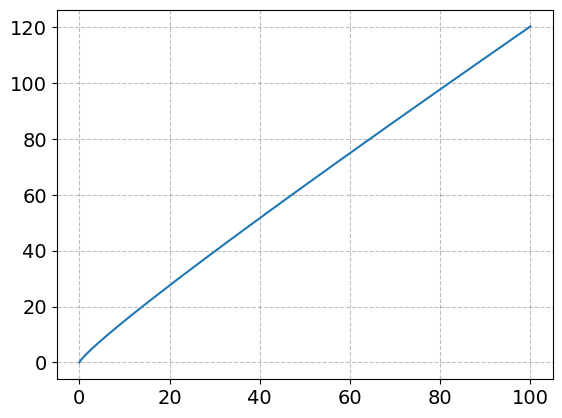

In [98]:
# Number points 
N = 1000

# Max value of x1
L_max = 100

# Create a vector x1 from 0 to x_max, with N values
L_vec = np.linspace(0,L_max,N)

# Create an empty vector to store values of L_t+1
L2_vec = np.empty(N)

def L_func(lss,A=1,X=3,eta=0.8,mu=0.05,alpha=0.33):
    return eta*lss**(1-alpha)*(A*X)**(alpha)+(1-mu)*lss

# Fill out out the vector
for i, lss in enumerate(L_vec):
    L2_vec[i] = L_func(lss)

# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)
ax.plot(L_vec,L2_vec);

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

# Extension of the model

We can extend the model with technological growth. 
$$
\frac{A_{t+1}}{A_{t}} = g
$$

where g is this growth factor. In the baseline model $g=1$

We define $ l_{t} = \frac{L_{t}}{A_{t}} $

With technological change we get a slighty changed law of motion
$$
L_{t+1} = \eta L_{t}^{1-\alpha}(A_{t}X)^{\alpha}+(1-\mu)L_{t}, \ \ \ L_{0} \ given
$$


Analytical solution

In [12]:
lt = sm.symbols('l_t')
g = sm.symbols('g')
At = sm.symbols('A_t')
At1 = sm.symbols('A_{t+1}')
l_star = sm.symbols('l^*')
Yt = sm.symbols('Y_t')
Lt = sm.symbols('L_t')
Lt1 = sm.symbols('L_{t+1}')
A = sm.symbols('A')
X = sm.symbols('X')
yt = sm.symbols('y_t')
nt = sm.symbols('n_t')
alpha = sm.symbols('alpha')
mu = sm.symbols('mu')
eta = sm.symbols('eta')
L_star = sm.symbols('L^*')
y_star = sm.symbols('y^*')

In [13]:
# New law of motion
New_LOM = sm.Eq(Lt1, eta*Lt**(1-alpha)*(At*X)**alpha+(1-mu)*Lt)
New_LOM

Eq(L_{t+1}, L_t*(1 - mu) + L_t**(1 - alpha)*eta*(A_t*X)**alpha)

Dividing the law of motion with $ A_{t} $

$$
\frac{L_{t+1}}{A_{t}} = \eta A_{t}^{-1} L_{t}^{1-\alpha}(A_{t}X)^{\alpha}+(1-\mu) \frac{L_{t}}{A_{t}}
$$

In [14]:
# law of motion for l
New_LOM2 = sm.Eq((Lt1/At), eta*At**(-1)*Lt**(1-alpha)*(At*X)**alpha+(1-mu)*(Lt/At))
New_LOM2

Eq(L_{t+1}/A_t, L_t*(1 - mu)/A_t + L_t**(1 - alpha)*eta*(A_t*X)**alpha/A_t)

Note that: 
$$
\frac{L_{t+1}}{A_{t}} = \frac{L_{t+1}}{A_{t+1}} \frac{A_{t+1}}{A_{t}} = l_{t+1}g
$$

Substituting this into the modified law of motion

$$
l_{t+1} = \eta g^{-1} l_{t}^{1-\alpha} X^{\alpha}+g^{-1}(1-\mu) l_{t}
$$

To find the steady state value for the labor force we substitute, such that $l^* = l_{t} = l_{t+1}$ and solve for $l^*$:

In [15]:
# Substitute for l*
SS = sm.Eq(l_star, eta*g**(-1)*l_star**(1-alpha)*X**alpha+g**(-1)*(1-mu)*l_star)

# Solve for L_star
l_star_sol = sm.solve(SS, l_star)[0]

# Print the solution
l_star_sol

(X**alpha*eta/(g + mu - 1))**(1/alpha)

We can turn the expression for steady state labor force into a Python-function to evaluate the solution:

In [18]:
ss_l_func = sm.lambdify((g,X,eta,mu,alpha),l_star_sol)
ss_l_func(1,1,0.3,0.5,0.5)

0.36

Numerical solution

In [20]:
eta = 0.2
mu = 0.3
alpha = 1/3
g = 1
X = 2

obj_lss2 = lambda lss2: lss2 - (eta*g**(-1)*lss2**(1-alpha)*X**(alpha)+g**(-1)*(1-mu)*lss2)
result = optimize.root_scalar(obj_lss2,bracket=[0.1,1000],method='brentq')

print('the steady state for l is',result.root)  

the steady state for l is 0.5925925925925908


# Conclusion

Add concise conclusion. 